# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from skimage import io
from PIL import Image
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
import os, glob
import pickle
from sys import getsizeof
import datetime,time
import collections, random, re
from collections import Counter

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

In [4]:
import warnings
warnings.filterwarnings("ignore")

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [5]:
#Import the dataset and read the image into a seperate variable

images = '../input/flickr8k/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


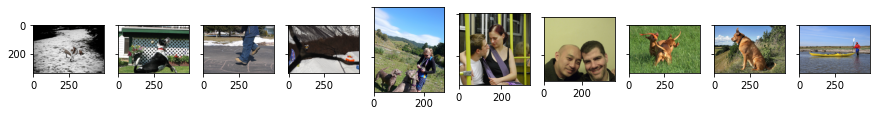

In [6]:
#Visualise both the images & text present in the dataset

def visualize_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
   
    for ax,image in zip(axes, images):
        ax.imshow(io.imread(image), cmap)

visualize_image(all_imgs[:10])

In [7]:
#Import the dataset and read the text file into a seperate variable

caption_file = "../input/flickr8k/captions.txt"
def load_doc(caption_file):
    
    text = pd.read_csv(caption_file)
    
    return text

doc = load_doc(caption_file)
print(doc[:300])

                         image  \
0    1000268201_693b08cb0e.jpg   
1    1000268201_693b08cb0e.jpg   
2    1000268201_693b08cb0e.jpg   
3    1000268201_693b08cb0e.jpg   
4    1000268201_693b08cb0e.jpg   
..                         ...   
295  1077546505_a4f6c4daa9.jpg   
296  1077546505_a4f6c4daa9.jpg   
297  1077546505_a4f6c4daa9.jpg   
298  1077546505_a4f6c4daa9.jpg   
299  1077546505_a4f6c4daa9.jpg   

                                               caption  
0    A child in a pink dress is climbing up a set o...  
1                A girl going into a wooden building .  
2     A little girl climbing into a wooden playhouse .  
3    A little girl climbing the stairs to her playh...  
4    A little girl in a pink dress going into a woo...  
..                                                 ...  
295  A boy in blue shorts slides down a slide into ...  
296  A boy in blue swimming trunks slides down a ye...  
297  A boy rides down a slide into a small backyard...  
298  A boy sliding do

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [8]:
file = open(caption_file,'rb')
caption_txt = file.read().decode('utf-8')
file.close()
var = caption_txt.split('\n')
var.pop(0)
var.pop(-1)
var

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a 

In [9]:
all_img_id = [line.split(',')[0].split('_')[0] for line in var]
all_img_vector = ['../input/flickr8k/Images/' + line.split(',')[0] for line in var]
annotations = [line.split(',')[1].lower() for line in var]

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path','Captions']) 
pd.set_option('display.max_colwidth',-1)  
df

,ID,Path,Captions
0,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .
3,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .
4,1000268201,../input/flickr8k/Images/1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a wooden cabin .
...,...,...,...
40450,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock face
40451,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a man is rock climbing high in the air .
40452,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock face covered in assist handles .
40453,997722733,../input/flickr8k/Images/997722733_0cb5439472.jpg,a rock climber in a red shirt .


In [10]:
#Create the vocabulary & the counter for the captions

def func(var):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', var.lower())))

def vocab(captions):
    words = []
    for sentence in captions:
        sent_words = func(sentence)
        for word in sent_words: 
            words.append(word)
    return sorted(words)

vocabulary = vocab(df['Captions'])

val_count = Counter(vocabulary)
val_count

Counter({'08': 1,
         '1': 2,
         '10': 1,
         '104': 1,
         '11': 2,
         '12': 3,
         '13': 2,
         '13406': 1,
         '157': 1,
         '19': 3,
         '1915': 1,
         '1923': 1,
         '1950s': 1,
         '2': 22,
         '2008': 1,
         '21': 1,
         '23': 3,
         '25': 3,
         '28': 3,
         '281': 2,
         '3': 14,
         '32': 1,
         '33': 1,
         '3rd': 2,
         '4': 18,
         '42': 1,
         '4x4': 1,
         '5': 18,
         '50': 1,
         '52': 2,
         '57': 1,
         '58': 2,
         '6': 8,
         '625': 1,
         '661': 1,
         '7': 2,
         '75': 1,
         '8': 15,
         '80': 1,
         '84': 2,
         '90': 1,
         '93': 1,
         '97': 1,
         'a': 61436,
         'abandon': 2,
         'abandoned': 5,
         'abarrotes': 1,
         'abdomen': 1,
         'ability': 1,
         'aboard': 1,
         'aboriginal': 1,
         'about': 142,

In [11]:
#Visualise the top 30 occuring words in the captions
df_word = pd.DataFrame.from_dict(val_count, orient='index')

df_word = df_word.sort_values(by=[0],ascending=False).reset_index()
df_word =df_word.rename(columns={'index':'word', 0:'count'})
df_word

,word,count
0,a,61436
1,in,18193
2,the,17677
3,on,10369
4,is,9069
...,...,...
8310,kneepads,1
8311,kneeled,1
8312,kiyaking,1
8313,kingsworth,1


<AxesSubplot:xlabel='word', ylabel='count'>

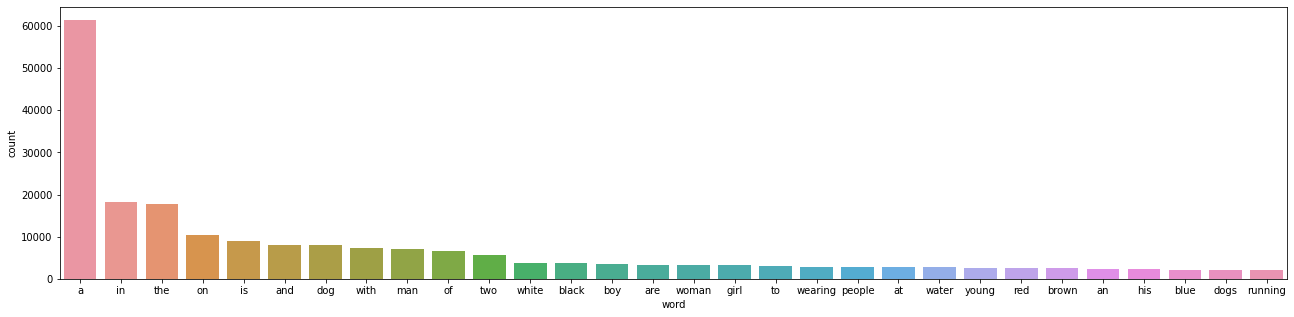

In [12]:
plt.figure(figsize=(22,5))
df_word1 = df_word[:30]
sns.barplot(x = 'word',y = 'count',data = df_word1)

In [13]:
#Create a list which contains all the captions

df['Captions']= df['Captions'].apply(lambda x : f"<start> {x} <end>")
annotations = df['Captions']

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
all_img_path = sorted(set(all_img_vector))

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [14]:
# create the tokenizer

#your code here

def func1(all_captions,all_img_vector):
    img_captions, img_name_vector = shuffle(all_captions,all_img_vector,random_state=42)
    return img_captions,img_name_vector

img_captions, all_img_vector = func1(annotations,all_img_vector)

def tokenized_captions(top_cap,captions):
    special_chars = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_freq_words,
                                                  oov_token="UNK",
                                                  filters=special_chars)
    tokenizer.fit_on_texts(captions)
    tokenizer.word_index['PAD'] = 0
    tokenizer.index_word[0] = 'PAD'   
   
    return tokenizer 

In [15]:
top_freq_words = 5000
tokenizer = tokenized_captions(top_freq_words,img_captions)

cap_seqs = tokenizer.texts_to_sequences(img_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(cap_seqs, padding='post')

print(cap_vector[:5])

[[   3    2   55 1591  593    8 3971    2  224  123    2 1455    4    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3   14   28   32  499    7    6 1667  172    4    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   12    5  166    8   40    7    2   83   91   88   24    6
   458   75    6 3972    4    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2  882   15   10    8   33    7    6   42    4    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   3    2   43  378  728    4    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]]


In [16]:
# Create word-to-index and index-to-word mappings.

#your code here

def word_to_index(word):
    print("Word = {}, index = {}".format(word, tokenizer.word_index[word]))

word_to_index("<start>")
word_to_index("dog")

Word = <start>, index = 3
Word = dog, index = 10


In [17]:
def index_to_word(index):
    print("Index = {}, Word = {}".format(index, tokenizer.index_word[index]))

index_to_word(15)
index_to_word(4500)

Index = 15, Word = white
Index = 4500, Word = rummaging


<AxesSubplot:xlabel='Word', ylabel='Count'>

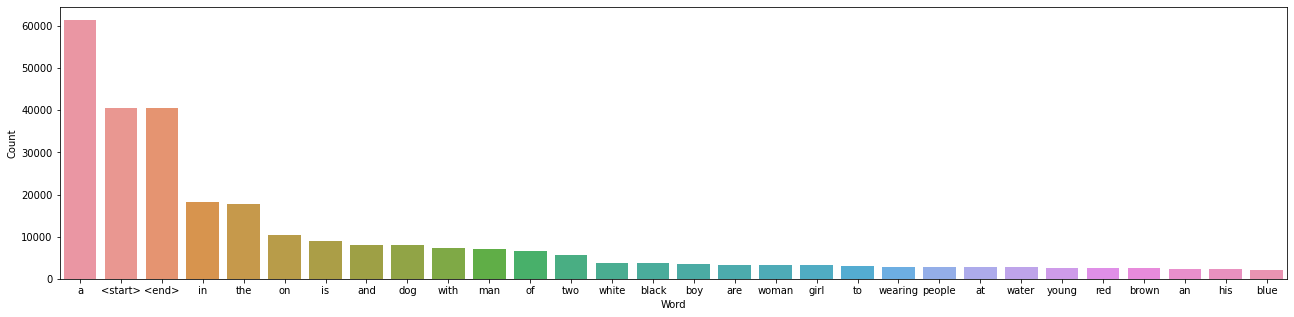

In [18]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here

wordcount = tokenizer.word_counts
import operator
wordcount = sorted(wordcount.items(), key=operator.itemgetter(1),reverse=True)
mylist = []
for a,b in wordcount[:30]:
    mylist.append((a,b))
top30 = pd.DataFrame(mylist,columns =['Word','Count'])
plt.figure(figsize=(22,5))
sns.barplot(x = 'Word',y = 'Count',data = top30)

In [19]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(cap_seqs, padding='post')

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [20]:
#write your code here

image_path = '../input/flickr8k/Images/'
def resize_image(image_path):
    shape = (299, 299)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,shape)
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, image_path

batch_size = 64
shape = (299, 299)
encode = sorted (set(all_img_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(encode)
image_dataset = image_dataset.map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [21]:
#write your code here

image_train, image_test, captions_train, captions_test = train_test_split(all_img_vector,cap_vector,test_size = 0.2,random_state = 42)

In [22]:
sample_img_batch, sample_cap_batch = next(iter(image_dataset))
print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
print(sample_cap_batch.shape) #(batch_size, max_len)

(64, 299, 299, 3)
(64,)


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [23]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [24]:
from glob import glob
from tqdm import tqdm

# Deleting previously created  npy files
output_imgs = glob("../working/" + '*.*')
if len(output_imgs)> 0:
    for path in (output_imgs):
        os.remove(path)
output_imgs = glob("../working/" + '*.npy')

os.mkdir("../working/OUTPUT/")
imgs_npy = []
for img,path in tqdm(image_dataset):
    features = image_features_extract_model(img)
    features = tf.reshape(features,
                              (features.shape[0], -1,features.shape[3]))
    
    for bf, p in zip(features, path):
        filename = p.numpy().decode("utf-8").split('/')[-1]
        imgs_npy.append(filename)
        np.save("../working/" + filename, bf.numpy())

100%|██████████| 127/127 [00:57<00:00,  2.20it/s]


In [25]:
img_to_cap_vector = collections.defaultdict(list)

for img,cap in zip(all_img_vector,cap_vector):
    img_to_cap_vector[img].append(cap)
    
def vector_to_sentence(var):
    captions_word =[]
    for captions in var:
        list_caption = list(captions)
        captions_word.append(' '.join(tokenizer.index_word[i] for i in list_caption))
    return captions_word

In [26]:
tf.random.set_seed(42)
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)
slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

image_train = []
captions_train = []
for imgt in img_name_train_keys:
    captions_len = len(img_to_cap_vector[imgt])
    image_train.extend([imgt] * captions_len)
    captions_train.extend(img_to_cap_vector[imgt])

image_test = []
captions_test = []
for imgtest in img_name_val_keys:
    captions_len = len(img_to_cap_vector[imgtest])
    image_test.extend([imgtest] * captions_len)
    captions_test.extend(img_to_cap_vector[imgtest])

In [27]:
print("Image_train = {}, Captions_train = {}".format(len(image_train), len(captions_train)))
print("Image_test = {}, Captions_test = {}".format(len(image_test), len(captions_test)))

Image_train = 32360, Captions_train = 32360
Image_test = 8095, Captions_test = 8095


In [28]:
def file(filename):
    return ('../input/flickr8k/Images' + filename)

def vector_to_sentence(caplist):
    captions_word =[]
    for captions in caplist:
        list_caption = list(captions)

        captions_word.append(' '.join(tokenizer.index_word[i] for i in list_caption))
    return captions_word

caplist_train = []
captions_word = vector_to_sentence(list(captions_train[0:30]))
print(captions_word[15:])

['<start> a woman looking upward with her hand above her head <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> a woman is looking at the ceiling while taking off her hat <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> a woman looking up towards a wide ring <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> an attractive woman holds a UNK above her head <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> a woman in a dress raises her arm over her head <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> the person is wearing shorts and climbing a gray sand hill under a blue sky <end> PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD', '<start> a person is hiking to the top of a 

In [29]:
# write your code to extract features from each image in the dataset

def map_func(img_name, cap):
    filename = "../working/" + img_name.decode('utf-8').split('/')[-1] + ".npy"
    img_tensor = np.load(filename)
    return img_tensor, cap

batch_size = 64
buffer_size = 1000
train_dataset = tf.data.Dataset.from_tensor_slices((image_train, captions_train))
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((image_test, captions_test))
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,35)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [31]:
features_shape = 2048
attention_features_shape = 64
embedding_dim = 256 
units = 512
vocab_size = top_freq_words + 1
train_num_steps = len(image_train) // batch_size
test_num_steps = len(image_test) // batch_size

### Encoder

In [32]:
def padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :] 

def look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask 

def scaled_dot_product_attention(W1, W2, v, mask):
    matmul_W1W2 = tf.matmul(W1, W2, transpose_b=True)
    dimW2 = tf.cast(tf.shape(W2)[-1], tf.float32)
    scaled_attention_logits = matmul_W1W2/ tf.math.sqrt(dimW2)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9) 

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) 
    output = tf.matmul(attention_weights, v)

    return output, attention_weights

In [33]:
# Subclassing tensor layer to create multilayer Attention layer to be later  used in Attention Layer
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        self.W1 = tf.keras.layers.Dense(d_model)
        self.W2 = tf.keras.layers.Dense(d_model)
        self.Wv = tf.keras.layers.Dense(d_model)
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, W1, W2, mask=None):
        batch_size = tf.shape(q)[0]
        W1 = self.W1(W1) 
        W2 = self.W2(W2)
        Wv = self.Wv(v) 

        W1 = self.split_heads(W1, batch_size)
        W2 = self.split_heads(W2, batch_size)  
        v = self.split_heads(v, batch_size)  

        scaled_attention, attention_weights = scaled_dot_product_attention(W1, W2, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        concat_attention = tf.reshape(scaled_attention,
                                 (batch_size, -1, self.d_model)) 

        output = self.dense(concat_attention) 
        return output, attention_weights

    def point_wise_feed_forward_network(d_model, dff):
        return tf.keras.Sequential([
                tf.keras.layers.Dense(dff, activation='relu'), 
                tf.keras.layers.Dense(d_model)])

In [34]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)


    def call(self, x, training, mask=None):
        attn_output, _ = self.mha(x, x, x, mask) 
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output) 

        ffn_output = self.ffn(out1)  
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output) 
        return out2

In [35]:

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask) 
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)  

        ffn_output = self.ffn(out2) 
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [36]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, row_size,col_size,rate=0.1):
        super(Encoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Dense(self.d_model,activation='relu')
        self.pos_encoding = positional_encoding_2d(row_size,col_size,self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask=None):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
            return x

In [37]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers,d_model,num_heads,dff, target_vocab_size, maximum_position_encoding,   rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding_1d(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                         for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training,look_ahead_mask=None, padding_mask=None):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                            look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        return x, attention_weights

In [38]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embedding_dim)
        
    def call(self, features):
        features = self.dense(features)
        features = tf.nn.relu(features)
        return features

In [39]:
encoder=Encoder(embedding_dim)

### Attention model

In [40]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden,1) 
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)
        attention_weights =  tf.nn.softmax(score,axis=1)
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector,axis=1)
        return context_vector, attention_weights

### Decoder

In [41]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)
        self.embed = tf.keras.layers.Embedding(vocab_size,embed_dim) 
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)
        self.d2 = tf.keras.layers.Dense(vocab_size)
        self.attention = Attention_model(self.units)

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features,hidden)
        embed =  self.embed(x)
        embed =  tf.concat([tf.expand_dims(context_vector,1),embed],axis=-1)
        output,state = self.gru(embed)
        x = self.d1(output)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.d2(x)
        return x,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [42]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [43]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) 
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) 
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) 

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [44]:
class final_Model(tf.keras.Model):
    def __init__(self, embedding_dim,units,vocab_size, rate=0.1):
        super(final_Model, self).__init__()
        self.encoder = Encoder(embedding_dim)
        self.decoder = Decoder(embedding_dim, units, vocab_size)
        self.final_layer = tf.keras.layers.Dense(vocab_size)

    def call(self, inp, tar, training,look_ahead_mask=None,dec_padding_mask=None,enc_padding_mask=None   ):
        enc_output = self.encoder(embeding_dim) 
        dec_output, attention_weights = self.decoder(embeding_dim,units,vocab_size)
        final_output = self.final_layer(dec_output) 
        return final_output, attention_weights

In [45]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [46]:
learning_rate = CustomSchedule(embedding_dim)

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                    epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [48]:
metric = tf.keras.metrics.Mean('train_loss',dtype=tf.float32)

In [49]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [50]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [51]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    ckpt.restore(ckpt_manager.latest_checkpoint)

In [52]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor,training =True)

        for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

          # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))
    metric(loss)    
    return loss, total_loss

In [53]:
@tf.function
def test_step(img_tensor, target):
    loss = 0

    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    features = encoder(img_tensor)
    for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)
            predicted_id = tf.argmax(predictions[0])
            dec_input = tf.expand_dims([predicted_id] * target.shape[0] , 1)
   
    avg_loss = (loss / int(target.shape[1]))
        
    return loss, avg_loss

In [54]:
def test_loss_cal(dataset):
    total_loss = 0

    for (batch,(img_tensor,target)) in enumerate(dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
   
    
    return total_loss/int(target.shape[1])

train_loss = tf.keras.metrics.Mean('train_loss',dtype=tf.float32)

In [55]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
    avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|▋         | 1/15 [02:45<38:34, 165.32s/it]

For epoch: 1, the train loss is 1.925, & test loss is 6.057
Time taken for 1 epoch 165.16362476348877 sec

Test loss has been reduced from 100.000 to 6.057


 13%|█▎        | 2/15 [04:03<24:39, 113.81s/it]

For epoch: 2, the train loss is 1.420, & test loss is 7.874
Time taken for 1 epoch 77.75447654724121 sec



 20%|██        | 3/15 [05:20<19:26, 97.18s/it] 

For epoch: 3, the train loss is 1.193, & test loss is 7.438
Time taken for 1 epoch 77.3813886642456 sec



 27%|██▋       | 4/15 [06:38<16:25, 89.61s/it]

For epoch: 4, the train loss is 1.085, & test loss is 7.588
Time taken for 1 epoch 77.99434065818787 sec



 33%|███▎      | 5/15 [07:56<14:15, 85.57s/it]

For epoch: 5, the train loss is 1.016, & test loss is 7.792
Time taken for 1 epoch 78.39952778816223 sec



 40%|████      | 6/15 [09:14<12:26, 82.94s/it]

For epoch: 6, the train loss is 0.961, & test loss is 7.604
Time taken for 1 epoch 77.8515772819519 sec



 47%|████▋     | 7/15 [10:32<10:50, 81.31s/it]

For epoch: 7, the train loss is 0.913, & test loss is 7.950
Time taken for 1 epoch 77.9433159828186 sec



 53%|█████▎    | 8/15 [11:50<09:20, 80.12s/it]

For epoch: 8, the train loss is 0.872, & test loss is 7.996
Time taken for 1 epoch 77.55970287322998 sec



 60%|██████    | 9/15 [13:08<07:57, 79.55s/it]

For epoch: 9, the train loss is 0.828, & test loss is 7.883
Time taken for 1 epoch 78.29827427864075 sec



 67%|██████▋   | 10/15 [14:26<06:34, 78.97s/it]

For epoch: 10, the train loss is 0.777, & test loss is 8.353
Time taken for 1 epoch 77.66078639030457 sec



 73%|███████▎  | 11/15 [15:43<05:13, 78.49s/it]

For epoch: 11, the train loss is 0.733, & test loss is 8.338
Time taken for 1 epoch 77.40583729743958 sec



 80%|████████  | 12/15 [17:01<03:54, 78.18s/it]

For epoch: 12, the train loss is 0.691, & test loss is 8.485
Time taken for 1 epoch 77.48367428779602 sec



 87%|████████▋ | 13/15 [18:18<02:35, 77.90s/it]

For epoch: 13, the train loss is 0.654, & test loss is 8.751
Time taken for 1 epoch 77.25332474708557 sec



 93%|█████████▎| 14/15 [19:35<01:17, 77.82s/it]

For epoch: 14, the train loss is 0.620, & test loss is 8.977
Time taken for 1 epoch 77.63606572151184 sec



100%|██████████| 15/15 [20:52<00:00, 83.52s/it]

For epoch: 15, the train loss is 0.588, & test loss is 9.092
Time taken for 1 epoch 76.89624977111816 sec



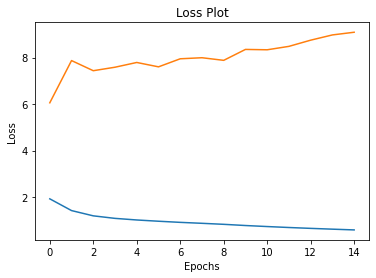

In [56]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [57]:
def init_features(image):
    temp_input = tf.expand_dims(resize_image(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    return features,dec_input

In [58]:
max_length = max([len(cap) for cap in cap_seqs])

def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)
    features,dec_input = init_features(image)
    
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,features,hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
      
        result.append(tokenizer.index_word[predicted_id])

        if (tokenizer.index_word[predicted_id] == "<end>"):
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption

In [59]:
def plot_attmap(caption, attention_plot, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(attention_plot[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((299, 299), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [60]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

In [61]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

../input/flickr8k/Images/3466891862_9afde75568.jpg
the small dog returns with his stick UNK a little brown and white dog jumping over a grassy field trying to performing through a grassy field with green grass
BELU score: 100.0
Real Caption: the small dog returns with his stick UNK
Prediction Caption: a little brown and white dog jumping over a grassy field trying to performing through a grassy field with green grass


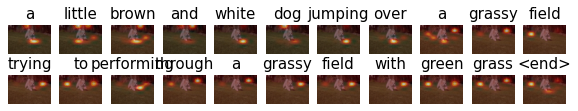

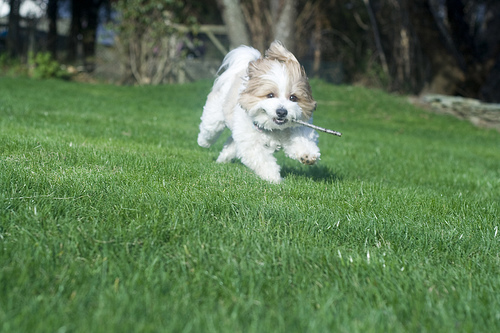

In [62]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
print(test_image)

real_caption = ' '.join([tokenizer.index_word[i] for i in captions_test[rid] if i not in [0]])
result, weight,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
print(real_caption,pred_caption)
real_appn.append(real_caption.split())
reference = list(real_appn)
candidate = pred_caption.split()
#Cummunilative and n
score = sentence_bleu(reference, candidate, weights=(0,0,1,0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, weight, test_image)


Image.open(test_image)

In [63]:
captions = evaluate(test_image)
print(captions)

(['a', 'white', 'dog', 'playing', 'with', 'a', 'black', 'spots', 'is', 'trying', 'to', 'catch', 'a', 'dogsled', 'running', 'in', 'a', 'grassy', 'field', '<end>'], array([[7.99733698e-07, 2.95708969e-06, 2.23537944e-02, ...,
        2.30051631e-10, 2.22676636e-06, 1.02323588e-06],
       [5.26806207e-06, 6.25735129e-06, 3.38444635e-02, ...,
        1.58572977e-08, 1.43917282e-06, 2.78549351e-06],
       [2.36587539e-06, 7.37003484e-06, 1.54097639e-02, ...,
        2.02071089e-08, 4.72454803e-06, 3.35272466e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), <tf.Tensor: shape=(1, 5001), dtype=float32, numpy=
array([[-24.232841 ,   4.8000236,  -1.3498772, ...,  -7.3692355,